In [29]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [30]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

In [31]:
column_names = ["age", "sex", "cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]
df = pd.read_csv(url, names = column_names, na_values = '?')

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [51]:
df.drop(['ca','trestbps','chol', 'fbs', 'oldpeak','thal','slope'],axis = 1 , inplace=True, errors='ignore')

In [52]:
df.head()

,age,sex,cp,restecg,thalach,exang,target
0,63.0,1.0,1.0,2.0,150.0,0.0,0
1,67.0,1.0,4.0,2.0,108.0,1.0,1
2,67.0,1.0,4.0,2.0,129.0,1.0,1
3,37.0,1.0,3.0,0.0,187.0,0.0,0
4,41.0,0.0,2.0,2.0,172.0,0.0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restecg  303 non-null    float64
 4   thalach  303 non-null    float64
 5   exang    303 non-null    float64
 6   target   303 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 16.7 KB


In [54]:
df.isnull().sum()

age        0
sex        0
cp         0
restecg    0
thalach    0
exang      0
target     0
dtype: int64

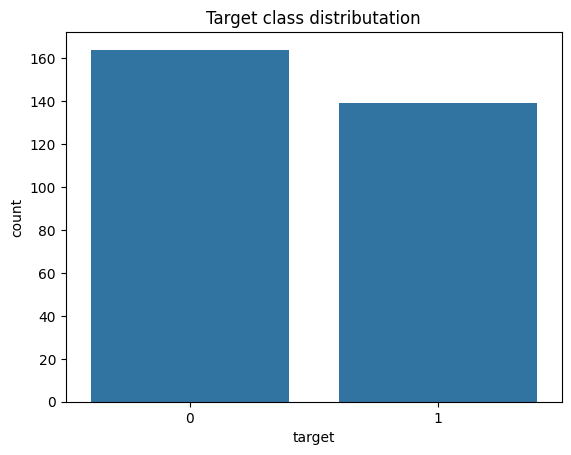

In [55]:
sns.countplot(x = 'target', data= df)
plt.title('Target class distributation')
plt.show()

In [56]:
df['target'] = df['target'].apply(lambda x :1 if x > 0 else 0)

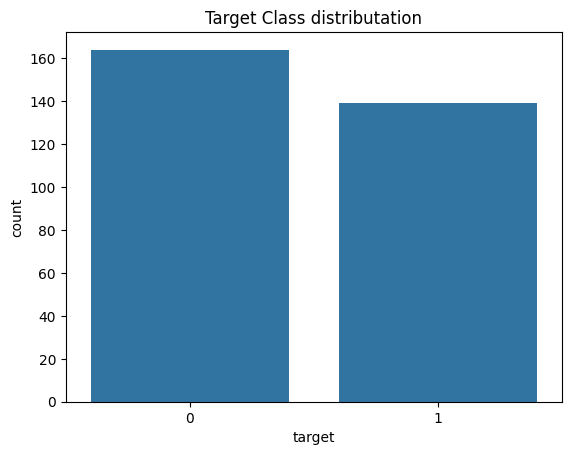

In [57]:
sns.countplot(x = 'target', data= df)
plt.title('Target Class distributation')
plt.show()

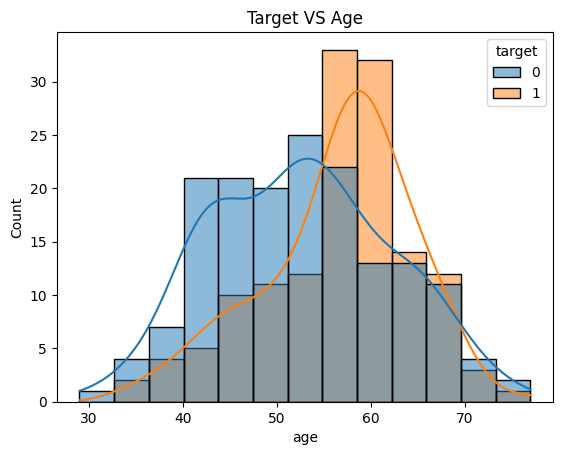

In [58]:
sns.histplot(x= 'age', hue= 'target', data=df, kde=True)
plt.title('Target VS Age')
plt.show()

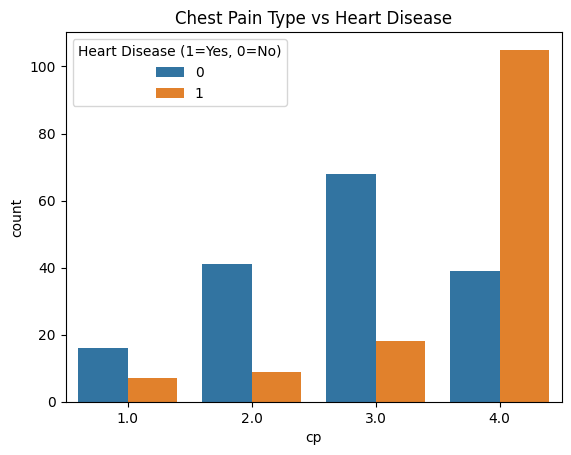

In [59]:

sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.legend(title='Heart Disease (1=Yes, 0=No)')
plt.show()


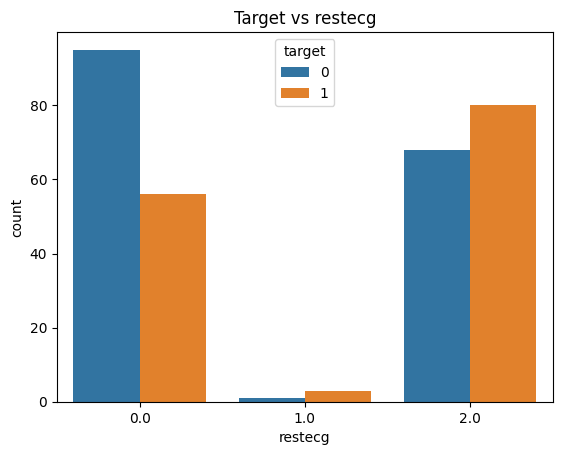

In [60]:
sns. countplot(x = 'restecg', hue= 'target', data= df )
plt.title ('Target vs restecg')
plt.show()

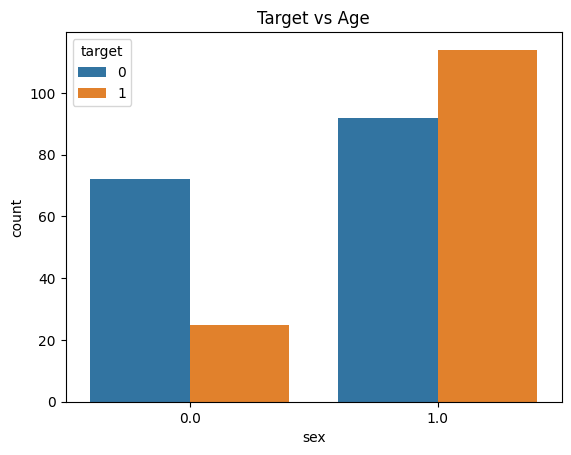

In [69]:
sns.countplot(x = 'sex' , hue='target' , data=df)
plt.title('Target vs Age' )
plt.show()

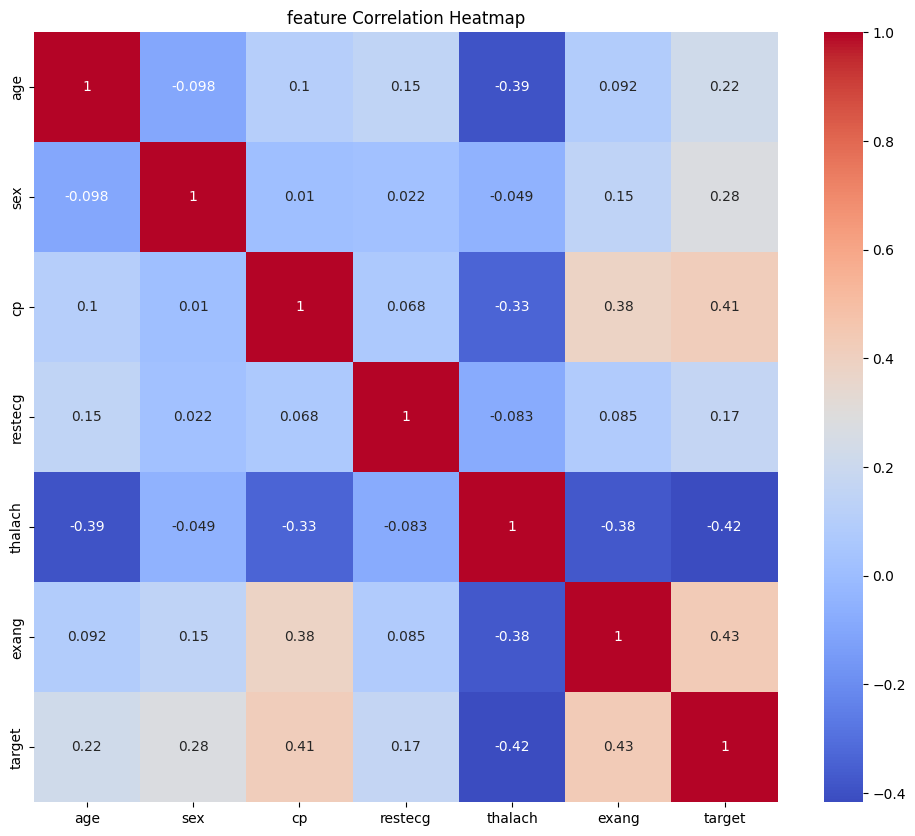

In [70]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('feature Correlation Heatmap')
plt.show()

In [62]:
X = df.drop('target' , axis=1)
y = df['target']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42,stratify=y)

In [64]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

In [65]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [66]:
predictionValues = pipeline.predict(X_test)

In [71]:
acc= accuracy_score(y_test, predictionValues)
cm = confusion_matrix(y_test, predictionValues)
cr = classification_report(y_test, predictionValues)

#printing the scores
print(f'Accuracy: {acc}')
print(f'Confusion Matrix: \n {cm}') #\n: escape sequence
print(f'Classification Report: \n {cr}')

Accuracy: 0.819672131147541
Confusion Matrix: 
 [[28  5]
 [ 6 22]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.81      0.79      0.80        28

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [68]:
import pickle
writebinary = open('heartdiseasepickle.pkl', 'wb')
pickle.dump(pipeline, writebinary)
writebinary.close()